# Loading the Libraries from python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.stats import diagnostic as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

### Loading the data

In [2]:
pwd

'C:\\Users\\Wale'

# Data Inspection

In [3]:
variable = pd.read_csv("C:\\Users\\Wale\\Downloads\\train.csv")
variable.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
variable.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Descriptive Statistics 

In [5]:
variable.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


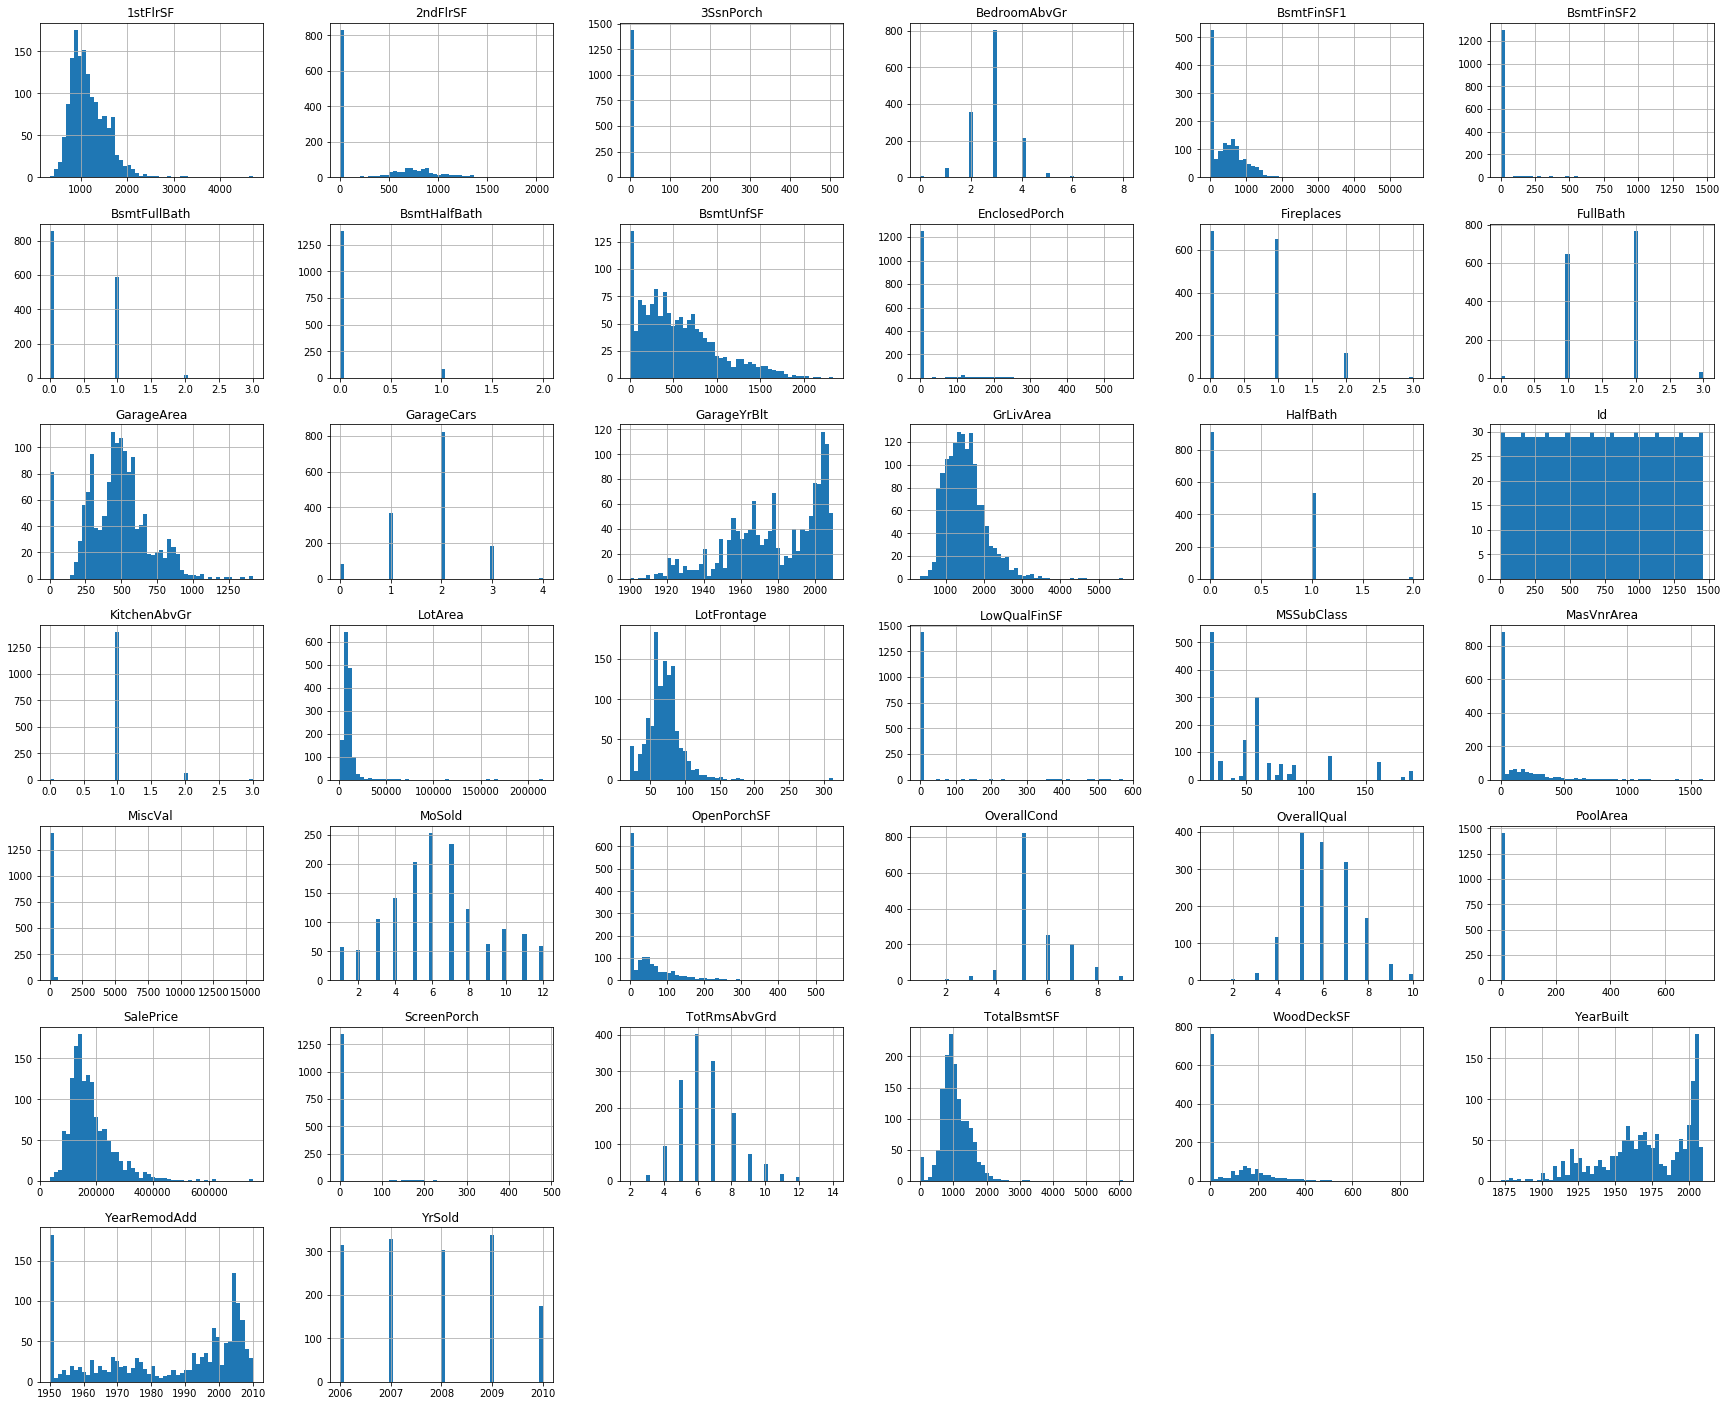

In [6]:
#Histograms for all the variables
variable.hist(bins=50, figsize=(30,25))
plt.show()

### Taking a look at the Dependent Variable

In [7]:
variable['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

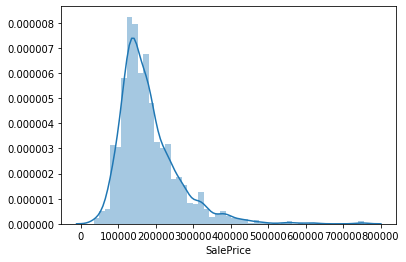

In [8]:
sns.distplot(variable["SalePrice"])

In [9]:
variable['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

# Checking Assimptions and Preprocessing

### Data Preparation for Multiple Regression Analysis

#####  Feature selection

For the Multiple regression analysis we would conduct for this project I would select the most important variables based on their correlations with the dependent varaible. These variables are feature that best describe the dependent variable.

In [10]:
corr_matrix = variable.corr()

In [11]:
#pearson's Distance correlation equation - how much they contribute to the y variable

corr_matrix["SalePrice"].sort_values(ascending = False)

#suprising that the overall condition doesnt really have a correlation on the price

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Using pearson's Distance correlation equation we can see the features that contribute the most to the SalePrice which is the dependent variiable. 

##### Features selected
    OverallQual      0.790982
    GrLivArea        0.708624
    GarageCars       0.640409
    GarageArea       0.623431
    TotalBsmtSF      0.613581
    1stFlrSF         0.605852
   

 ##### What I mean by a strong relationship are features that contribute more than or equal 60% of the 

In [12]:
corr_matrix["OverallQual"].sort_values(ascending = False)

OverallQual      1.000000
SalePrice        0.790982
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
YearRemodAdd     0.550684
FullBath         0.550600
GarageYrBlt      0.547766
TotalBsmtSF      0.537808
1stFlrSF         0.476224
TotRmsAbvGrd     0.427452
MasVnrArea       0.411876
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
HalfBath         0.273458
LotFrontage      0.251646
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
BsmtFullBath     0.111098
LotArea          0.105806
BedroomAbvGr     0.101676
MoSold           0.070815
PoolArea         0.065166
ScreenPorch      0.064886
MSSubClass       0.032628
3SsnPorch        0.030371
YrSold          -0.027347
Id              -0.028365
LowQualFinSF    -0.030429
MiscVal         -0.031406
BsmtHalfBath    -0.040150
BsmtFinSF2      -0.059119
OverallCond     -0.091932
EnclosedPorch   -0.113937
KitchenAbvGr    -0.183882
Name: Overal

#### Estimated Causal variables of the Overall Quality of the houses. 

Although one cannot clearly state that these variables are the only factors to be examined to determine the quality of a house, looking at the correlation matrix we can infer that the following variables have a strong impact on the quality of a house and are considered as estimated causal variables:

    1. SalePrice        0.790982
    2. GarageCars       0.600671
    3. GrLivArea        0.593007
    4. YearBuilt        0.572323
    5. GarageArea       0.562022
    6. YearRemodAdd     0.550684
    7. FullBath         0.550600
    8. GarageYrBlt      0.547766
    9. TotalBsmtSF      0.537808

### Assumption 1: Checking for Linearity

Before performing  a multiple regression you have to check for the linearity between each of the independent variables and the dependent variable 

In [13]:
# lets drop the variables we would not be using

data =variable.drop(['MSSubClass',"MSZoning", "LotFrontage","LotArea","Street","Alley","LotShape","Street","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1"
                       ,"BsmtFinType2","BsmtFinSF2","BsmtUnfSF","Heating","HeatingQC","CentralAir","Electrical","2ndFlrSF","LowQualFinSF","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu",
                      "GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal","MoSold","YrSold","Id","SaleType","SaleCondition"], axis=1)

In [14]:
data.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000


##### Overall Quality and Saleprice of the houses

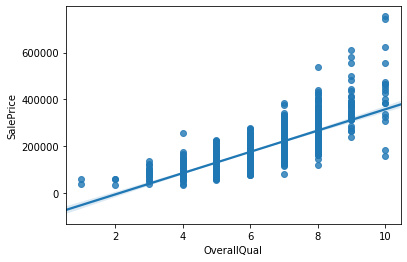

In [15]:
# Checking for a linear relationship
sns.regplot(x="OverallQual", y="SalePrice", data=data)

From the graph we can see that there is a linear relationship between the Overall Quality of a house and the amount it is sold.

It makes logic sence that this is the case, as the Overall quality of a house increases the price of the house gets higher.
But we can see that there are some exemptions, some houses with a quality of 10 (excellent) have lower prices equavalient to houses with 8 quality score which can be due to many other factors, like the neighborhood,and the number rooms etc.

##### Ground Living Area and Sales Price

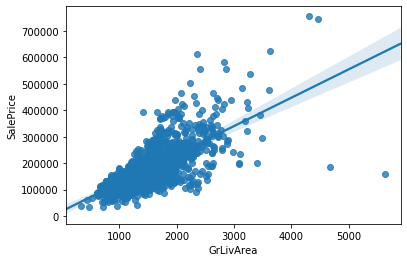

In [16]:
sns.regplot(x="GrLivArea", y="SalePrice", data=data)

There is clearly a linear relationship between the ground living arear and the sales price of each house. As the the sizes of the ground living area of each house increases the price its valued at also increases. Although we also have  some houses that have very large ground living area, infact one as the largest but are not highly valued in terms of prices.

##### Number of Cars in garage and Sale Price

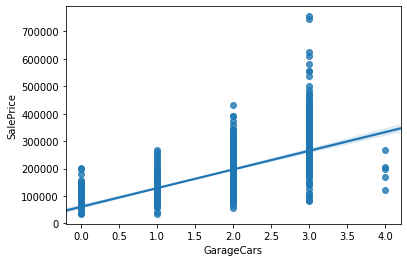

In [17]:
sns.regplot(x="GarageCars", y="SalePrice", data=data)

The number of garage cars in a house and the sales prices are also linearly related. From the graph, more cars means more sales price but not in all cases. Some times the prices are lower than expected even as the number of cars in a garage increase.

#####  Garage area and Saleprice

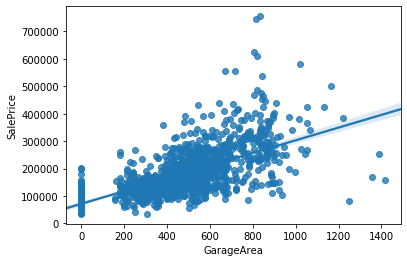

In [18]:
sns.regplot(x="GarageArea", y="SalePrice", data=data)

From the graph we can also see a linear relationship between the size of the garage area and the sales price of the house. This relationship is positive, as the size of the garage area increases the  prices increase too in most cases. There are special cases where the garage areas where really large but the value of the house was really low.

##### Total BasementSF and Saleprice 

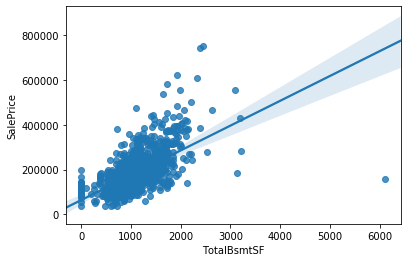

In [19]:
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=data)

Just like the others there is also a linear relationship here, as the total square feet of basement area increases we se an incease in house prices.There is also a distict case where the Total square feet of basement area for a house was about 6000 but had a low price, these can be a result of other factors that are not represented in this graph.

##### 1stFlrSF and Saleprice

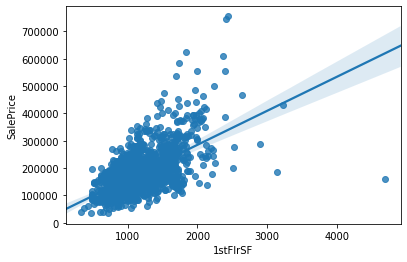

In [20]:
sns.regplot(x="1stFlrSF", y="SalePrice", data=data)

Like the independent variables we have considered there is a positive linear relationship between the Saleprice of a house and the 1st floor square foot. From the gragh we can observe that as prices increased the 1st floor square foot also went up. We can also see special cases where the price of the house was really high about 750000 dollars and the 1st floor sguare foot was alittle below avarage in size and another case where the price of the house was about 180000 and the 1st floor square foot size was the largest of all the houses.

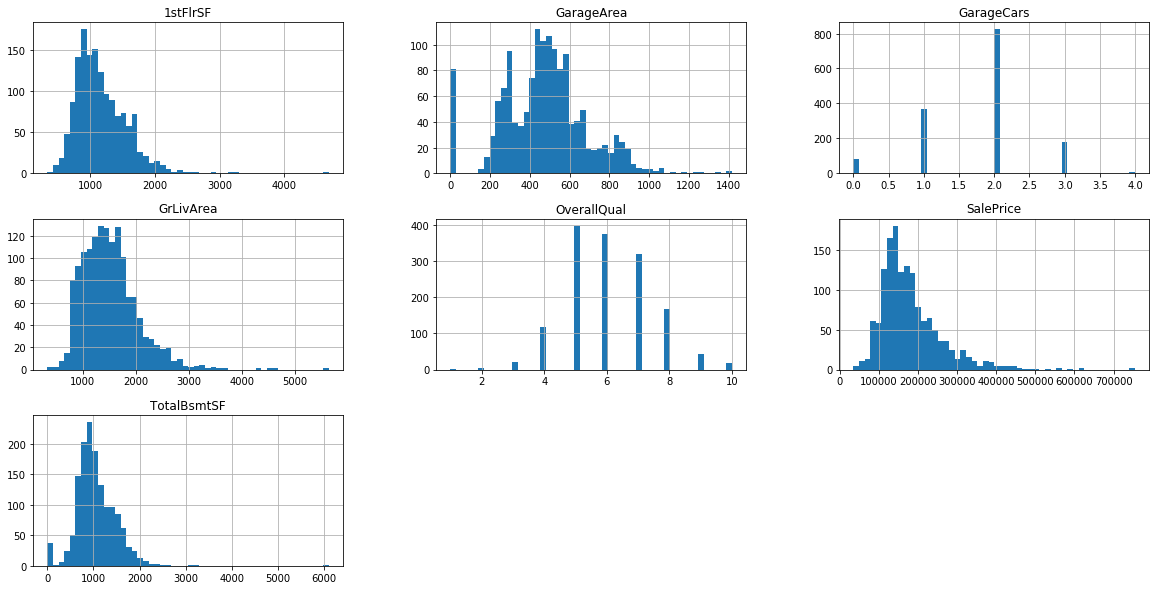

In [21]:
#Histograms for all the variables
data.hist(bins=50, figsize=(20,10))
plt.show()

##### Removing the Zeros

In [22]:
# printing rows where at the values are not equal to zero
data[(data != 0).all(1)]

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


Of 1460 rows we have 1349 that do not have complete zeros in a row.We would just rename this new data frame and use it as we go on in the analysis.

In [23]:
data1=data[(data != 0).all(1)]

In [24]:
data.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1057.429452,1162.626712,1515.463699,1.767123,472.980137,180921.195890
std,1.382997,438.705324,386.587738,525.480383,0.747315,213.804841,79442.502883
min,1.000000,0.000000,334.000000,334.000000,0.000000,0.000000,34900.000000
25%,5.000000,795.750000,882.000000,1129.500000,1.000000,334.500000,129975.000000
50%,6.000000,991.500000,1087.000000,1464.000000,2.000000,480.000000,163000.000000
75%,7.000000,1298.250000,1391.250000,1776.750000,2.000000,576.000000,214000.000000
max,10.000000,6110.000000,4692.000000,5642.000000,4.000000,1418.000000,755000.000000


##### Treating Outliers

I would be treating the outliers by filtering out figures that are 3 standard deviations away from the mean. We are doing this because the after removing the outliers the accuracy score of the model increased.

In [25]:
# detecting the outliers
data01 = data1[(np.abs(stats.zscore(data1)) < 3).all(axis=1)]

# the rows we removed
data1.index.difference(data01.index)

Int64Index([  58,  118,  178,  185,  197,  224,  304,  332,  349,  389,  420,
             440,  473,  496,  523,  527,  529,  581,  591,  608,  664,  691,
             747,  769,  798,  803,  825,  898,  916, 1024, 1044, 1046, 1061,
            1100, 1142, 1169, 1182, 1190, 1243, 1268, 1298, 1340, 1350, 1353,
            1373, 1417],
           dtype='int64')

In [26]:
data01.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,6.163469,1070.678434,1151.085955,1499.412126,1.838833,490.087490,180540.298542
std,1.241927,348.945740,342.582801,444.547966,0.603469,171.690497,64859.040763
min,3.000000,105.000000,483.000000,520.000000,1.000000,160.000000,40000.000000
25%,5.000000,816.000000,892.000000,1154.000000,1.000000,367.500000,135000.000000
50%,6.000000,1008.000000,1091.000000,1470.000000,2.000000,482.000000,167000.000000
75%,7.000000,1296.500000,1378.000000,1761.500000,2.000000,576.000000,214250.000000
max,10.000000,2223.000000,2259.000000,3082.000000,3.000000,1053.000000,415298.000000


In [27]:
data01

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


### Assumption 2:  Checking for Multicolinearity

##### What is Multicollinearity and why are we concerned?
Multicollinearity simple means independent variables are correlated with one another and we do not want that.

##### Why?
Like the name suggests, independent variables should be independent, if they are correlated it could cause problems in the model results. Multicollinearity can reduce the precision of coefficient estimates.

##### How do we check for multicollinearity?
Using the correlation matrix / heatmap and the variance inflation factor(VFI), we can detect correlation between independent variables and remove variables with high correlations.



In [28]:
data01_corr = data01.corr()
display(data01_corr)
# some of the variables are correlated to one another

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.453096,0.412831,0.543934,0.589596,0.513513,0.790056
TotalBsmtSF,0.453096,1.000000,0.876591,0.326259,0.453578,0.473547,0.605119
1stFlrSF,0.412831,0.876591,1.000000,0.444459,0.421510,0.451776,0.583300
GrLivArea,0.543934,0.326259,0.444459,1.000000,0.461308,0.423421,0.689326
GarageCars,0.589596,0.453578,0.421510,0.461308,1.000000,0.838075,0.654963
GarageArea,0.513513,0.473547,0.451776,0.423421,0.838075,1.000000,0.619923
SalePrice,0.790056,0.605119,0.583300,0.689326,0.654963,0.619923,1.000000


Here we can see that the Overall quality of the houses are related to all the variables. This makes perfect sence as these variables determine the quality of a house. We can also spot a high correlation between the garragecars and the garage area, more cars more garage area/size.
A general recommendation is that if any of our variables come back with a value of 5 or higher, then they
should be removed from the model. 

Lets use the VFI to see and remove such variables.

In [29]:
# define two data frames one before the drop and one after the drop
data_before = data01
data_after = data01.drop(['TotalBsmtSF','OverallQual',"GarageCars" ], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(data_before)
X2 = sm.tools.add_constant(data_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE REMOVING VARIABLES THAT ARE CORRELATED')
print('-'*100)
display(series_before)
print('DATA AFTER AFTER REMOVING CORRELATED VARIABLES')
print('-'*100)
display(series_after)

DATA BEFORE REMOVING VARIABLES THAT ARE CORRELATED
----------------------------------------------------------------------------------------------------


C:\Users\Wale\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          40.115011
OverallQual     2.781922
TotalBsmtSF     5.351349
1stFlrSF        5.059773
GrLivArea       2.223664
GarageCars      3.868818
GarageArea      3.560534
SalePrice       4.931538
dtype: float64

DATA AFTER AFTER REMOVING CORRELATED VARIABLES
----------------------------------------------------------------------------------------------------


const         18.176163
1stFlrSF       1.555114
GrLivArea      1.915885
GarageArea     1.657853
SalePrice      2.835284
dtype: float64

Before removing them, we can see that the VFI for Overall Quality and Garagecars is not soo high but to be safe its best to remove them.

##### New Data and Data Transformation

In [30]:
ndata = data_after

In [31]:
ndata.head()

,1stFlrSF,GrLivArea,GarageArea,SalePrice
0,856,1710,548,208500
1,1262,1262,460,181500
2,920,1786,608,223500
3,961,1717,642,140000
4,1145,2198,836,250000


In [32]:
# scaling the independent variables
ndata['GrLivArea'] = ndata['GrLivArea']/1000
ndata['GarageArea'] =  ndata['GarageArea'] / 1000
ndata['1stFlrSF'] =  ndata['1stFlrSF'] / 1000

I scaled these values so the are all in the same range and I was getting an error :"the condition number is large, 8.13e+03. This might indicate that there arestrong multicollinearity or other numerical problems" even after dealing with multicollinearity.

I also transformed the Sale price (dependent variable) using the Boxcox tranformation (reprocical squared root).I used this tranformation method because at first I found my model residuals were heteroskedastic which is a violation of the linear regression assumption of costant variance errors.

In [33]:
from scipy.stats import boxcox
ndata["SalePrice"] = boxcox(ndata["SalePrice"], -0.5)

# Multiple Linear Regression Model

##### Model Fomular
The general equation for a multiple linear regression             

##### y = β0 + β1x1 + β2x2 .... + βnxn

where:
   1. y is the dependent variable
   2. x1, x2...xn are the independent variables
   3.  β0 is the intercept
   4.  β1,β2...βn are the coefficients for x1, x2...xn repectively.
    
For our model the equation would look like this:

##### SalesPrice = β0 + β1(1stFlrSF) + β2(GrLivArea) + β3(GarageArea)

I would explain the terms in detail as i interpret the results

##### Define your variables

In [34]:
# Define the y variable
y = ndata.iloc[:, -1:]
y

,SalePrice
0,1.995620
1,1.995305
2,1.995770
3,1.994655
4,1.996000
...,...
1455,1.995219
1456,1.995636
1457,1.996126
1458,1.994695


In [35]:
# Define the X variables
X = ndata.iloc[:, :-1]
X

,1stFlrSF,GrLivArea,GarageArea
0,0.856,1.710,0.548
1,1.262,1.262,0.460
2,0.920,1.786,0.608
3,0.961,1.717,0.642
4,1.145,2.198,0.836
...,...,...,...
1455,0.953,1.647,0.460
1456,2.073,2.073,0.500
1457,1.188,2.340,0.252
1458,1.078,1.078,0.240


##### Build the Model

In [36]:
# Split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [37]:
#Train the model
from sklearn import linear_model
model = LinearRegression()

In [38]:
# pass through the X_train & y_train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Lets Check out our Output

In [39]:
# printing out the coeficients and intercept
print("Model Intercept: \n",model.intercept_)
print("Model Coefficents: \n", model.coef_)

Model Intercept: 
 [1.99236438]
Model Coefficents: 
 [[0.00061406 0.00085573 0.00146163]]


##### Interpreting the coeffients and the intercept of the model.

##### Model Intercept
The Intercept of the model,β0, is the value of the dependent variable when x1,x2...x3 are held constant or when they equal to zero. 

For our model, Sale price is 1.99236438 when all independent variables are held constant.

##### Model Coeffients
The model coefficients,β1,β2...β3, of the x variables are the changes in the dependent variable as a resault of change in x1,x2...x3. 

For our model we have all positive coefficients, meaning there is always an increase in Sales as the independent variables increase. we can confirm this from the scartter represion plots plotted above to check for linearity.

**β1(1stFlrSF)** - A unit increase in the first floor square foot size of a house is associated with a 0.00061406 unit increase in the price of a house.

**β2(GrLivArea)** - A unit increase in the size of ground living area of a house is associated with a 0.00085573 unit increase in house prices.

**β3(GarageArea)** - A unit increase in the size of garagearea per house is associated with a 0.00146163 unit increase in house prices.

In [40]:
# predictions
y_predict = model.predict(X_test)
# Show the first 5 predictions
y_predict[:5]


array([[1.9950248 ],
       [1.99501785],
       [1.9956627 ],
       [1.99418529],
       [1.99534632]])

From our model, the above are the first 5 extimates of the value of y.

In [41]:
# The actual values of y.
y[:5]

,SalePrice
0,1.995620
1,1.995305
2,1.995770
3,1.994655
4,1.996000


In [42]:
# score the model to check its accuracy
r2_score(y_test, y_predict)

0.6253961175322575

The prediction accuracy of the model is about 62%. We would compare the results with the new model below and see which is better.

# Evaluating the Model using te Statsmodel in Python.

In [43]:
# define our intput
X2 = sm.add_constant(X)
# create a OLS model
ols_model = sm.OLS(y, X2)
# fit the data
Y = ols_model.fit()

C:\Users\Wale\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     641.5
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          9.35e-256
Time:                        20:10:53   Log-Likelihood:                 7952.8
No. Observations:                1303   AIC:                        -1.590e+04
Df Residuals:                    1299   BIC:                        -1.588e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9924    6.3e-05   3.16e+04      0.000       1.992       1.993
1stFlrSF       0.0006   5.17e-05     10.790      0.000       0.000       0.001
GrLivArea      0.0009   3.93e-05     21.730      0.000       0.001       0.001
GarageArea     0.0015      0.000     14.441      0.000       0.001       0.002
==============================================================================
Omnibus:                      514.852   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2852.710
Skew:                          -1.755   Prob(JB):                         0.00
Kurtosis:                       9.342   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumption 3: Checking for autocorrelation.

Autocorrelation is the representation of the degree of similarity between a given time series data. it measures the relationship between a variable's current and past values and  linear relationships. It can range from 1 to -1. Usually, while testing for autocorrelation you want your p values to be larger than 0.05. 

If the there is auotocorrelation in the model the standard errors and the p-values cannot be trusted.

In [45]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
lag1 = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag1))
print('-'*100)
test_results = sms.acorr_ljungbox(Y.resid, lags = lag1)
# grab the p-values and the test statistics
ibvalue, p_val = test_results
if min(p_val) > 0.05:
 print("The lowest p-value found was {:.2}".format(min(p_val)))
 print("There is no autocorrelation.")
 print('-'*100)
else:
 print("The lowest p-value found was {:.2}".format(min(p_val)))
 print("There is autocorrelation.")
 print('-'*100)

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.28
There is no autocorrelation.
----------------------------------------------------------------------------------------------------


### Assumption 4: Checking for homoskedasticity.

Another assumption in regression analysis is that the variance of the residuals are constant or equal. That mean that there is homoskedasticity. If the residuals are heteroskedastic that is there is non constant variance of the error terms, the standard errors of our OLS cannot be trusted. 

We check for homoskedaticity using the Breusch-Pagan test.If the p-value of the result is greater than 0.05 the there is heteroskedasticity.

In [46]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = sms.het_breuschpagan(Y.resid, Y.model.exog)
print(pval, f_pval)
print('-'*100)
if pval > 0.05:
 print("For the Breusch-Pagan's Test")
 print("The p-value was {:.2}".format(pval))
 print("There is homoskedasticity.")
else:
 print("For the Breusch-Pagan's Test")
 print("The p-value was {:.2}".format(pval))
 print("There is heterosecdasticity.")


0.4425561668393537 0.44331631935828464
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.44
There is homoskedasticity.


### Confidence Intervals
By default statsmodel gives us the coefficients at 95% confidence interval. If the population from which this sample was drawn was sampled 100 times,approximately 95% of the confidence intervals would contain the "true" values of our coefficients. 

Because we drew out a sample of the total population we allow for uncertainty, meaning the coefficients may or may not lie within the range. This is no way to really check if this is correct or not.



In [47]:
# make some confidence intervals, 95% by default
Y.conf_int()

,0,1
const,1.992310,1.992557
1stFlrSF,0.000457,0.000660
GrLivArea,0.000776,0.000930
GarageArea,0.001273,0.001674


### Hypothesis testing with P-values.

We would try to determine the statistical significance of coefficient estimates and check if there is a relationship between the independent and te dependent variables.

**Null Hypothesis**: There is no relationship between the independent variable and the dependent variable and the coefficients is equal zero.

**Alternative Hypothesis**: There is a relationship between the independent variable and the dependent variable and the coefficients is not equal zero.

We reject the null hypothesis if there is a relationship and the coefficient is not equal to zero.

We fail to reject the null hypothesis is no relationship and the coefficients is equal to zero.

This testing id done using the p-values, if the p-values are less than 0.05 we reject the null and if otherwise we fail to reject the null.

In [48]:
# estimate the p-values
Y.pvalues

const         0.000000e+00
1stFlrSF      4.683974e-26
GrLivArea     1.485320e-89
GarageArea    5.988447e-44
dtype: float64

From the above p-values we can conclude that the nul hypothesis is rejected.
why? The p-values are less than 0.05.
This means there is a relationship between 1stFlrSF and Saleprice,GrLivArea and Saleprice and GarageArea and Saleprice. 

We ignore the p-value for the intercept.

### How well does the model fit the data?

We check the fit of the model using the R-squared value, we cant realy conclude on anythy now because to be sure if the model is a good fit we have to compare with another model which we would do at the later part of thiis project.

It is important to note that the higher the R-squared the better.

In [49]:
model.score(X, y)

0.5964839107583477

# Model selection

#### Can we have a model that fits better and performs better in predicting the prices?

Here i would use a linear regression model insteab an check the performance and fit of the model, then we would compare the results with what we already have.

I would fit another multiple linear model with the overal quality and ground living area of houses with the sales price which had the strongest correlation with saleprice.

In [50]:
# select the variables
data01.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000


In [51]:
#drop variables not needed
linear =data01.drop(["TotalBsmtSF",
"1stFlrSF",
"GarageCars",
"GarageArea"], axis=1)

In [52]:
# new dataframe
linear.head()

,OverallQual,GrLivArea,SalePrice
0,7,1710,208500
1,6,1262,181500
2,7,1786,223500
3,7,1717,140000
4,8,2198,250000


##### Data transformation 

Since the Overall quality is a categorical data we have to convert it to dummy variables and then transform the sales price using the log.

In [53]:
# coverting to dummy variable
newdata=pd.get_dummies(linear, columns=['OverallQual'], drop_first=True)

In [54]:
newdata["SalePrice"] = boxcox(newdata["SalePrice"], 0)

In [55]:
newdata['GrLivArea'] = newdata['GrLivArea']/1000

In [56]:
newdata.head()

,GrLivArea,SalePrice,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1.710,12.247694,0,0,0,1,0,0,0
1,1.262,12.109011,0,0,1,0,0,0,0
2,1.786,12.317167,0,0,0,1,0,0,0
3,1.717,11.849398,0,0,0,1,0,0,0
4,2.198,12.429216,0,0,0,0,1,0,0


Now our data is ready.

### Multiple Linear Regression Model 2

In [57]:
#define the variables
y = newdata.iloc[:, 1:2]
y

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [58]:
# x variables
feature =[
"GrLivArea",
"OverallQual_5",
"OverallQual_6",
"OverallQual_7",
"OverallQual_8",
"OverallQual_9",
"OverallQual_10"]
X = newdata[feature]
X

,GrLivArea,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,1.710,0,0,1,0,0,0
1,1.262,0,1,0,0,0,0
2,1.786,0,0,1,0,0,0
3,1.717,0,0,1,0,0,0
4,2.198,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1455,1.647,0,1,0,0,0,0
1456,2.073,0,1,0,0,0,0
1457,2.340,0,0,1,0,0,0
1458,1.078,1,0,0,0,0,0


In [59]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
#Train the model
from sklearn import linear_model
linear_model = LinearRegression()

In [61]:
# pass through the X_train & y_train data set
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# predictions
y_predict = linear_model.predict(X_test)
# Show the first 5 predictions
y_predict[:5]


array([[11.69889959],
       [11.96729001],
       [12.07676793],
       [11.85016887],
       [12.32825635]])

In [63]:
# score the model to check its accuracy
r2_score(y_test, y_predict)

0.7344504765365012

In [64]:
# define our input
X3 = sm.add_constant(X)
# create a OLS model
ols_model = sm.OLS(y, X3)
# fit the data
ols_linear = ols_model.fit()

C:\Users\Wale\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
ols_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     485.5
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:10:53   Log-Likelihood:                 376.32
No. Observations:                1303   AIC:                            -736.6
Df Residuals:                    1295   BIC:                            -695.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.2646      0.025    450.873      0.000      11.216      11.314
GrLivArea          0.2895      0.014     21.293      0.000       0.263       0.316
OverallQual_5      0.1735      0.022      7.914      0.000       0.130       0.216
OverallQual_6      0.2920      0.022     13.116      0.000       0.248       0.336
OverallQual_7      0.4648      0.023     19.880      0.000       0.419       0.511
OverallQual_8      0.6695      0.026     25.292      0.000       0.618       0.721
OverallQual_9      0.8929      0.038     23.639      0.000       0.819       0.967
OverallQual_10     0.8617      0.094      9.169      0.000       0.677       1.046
==============================================================================
Omnibus:                      189.672   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.117
Skew:                          -0.817   Prob(JB):                     9.90e-97
Kurtosis:                       5.340   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting results.

We can see from the R-squared that this model is a better fit to the data than the first multiple regression model.
This regression model as a 0.724 R-Squared and multiple regression as a 0.597 R-squared. We can also see that it performed slightly better with the prediction accuracy 0.73. 

The p-values are also statistically significant(except the overal_qual 4 which I have removed) and the coefficients are not equal to zero. So we reject the null hypothesis.